**Mapping unemployment data by county**

Import your libraries

In [1]:
import geopandas as gpd
import pandas as pd

Remember the magic command for every notebook

In [2]:
%matplotlib inline

Load up the unemployment data

In [52]:
df = pd.read_csv(
    "../data/unemployment_2018.csv",
    dtype = {
        "state_fips": "object",
        "county_fips": "object",
        "combined_fips": "str"
    }
)

df.head()

,state_fips,county_fips,combined_fips,name,percent_unemployed
0,01,001,01001,"Autauga County, AL",3.6
1,01,003,01003,"Baldwin County, AL",3.6
2,01,005,01005,"Barbour County, AL",5.2
3,01,007,01007,"Bibb County, AL",4.0
4,01,009,01009,"Blount County, AL",3.5


Load up the county map

In [53]:
counties = gpd.read_file(
    "../data/counties/",
    dtype = {
       "GEOID": "object" 
    }
)

counties.head()

,GEOID,NAME,NAMELSAD,geometry
0,31039,Cuming,Cuming County,"POLYGON ((246290.0411551894 -328619.667039162,..."
1,53069,Wahkiakum,Wahkiakum County,POLYGON ((-1770686.983550074 398793.6640856052...
2,35011,De Baca,De Baca County,POLYGON ((-422754.4474200015 -1210188.44889264...
3,31109,Lancaster,Lancaster County,"POLYGON ((260193.976508197 -463717.0213689978,..."
4,31129,Nuckolls,Nuckolls County,POLYGON ((146978.4586902861 -544334.3005906644...


Merge

In [56]:
merged = counties.merge(
    df,
    left_on = "GEOID",
    right_on = "combined_fips"
)

merged.head()

,GEOID,NAME,NAMELSAD,geometry,state_fips,county_fips,combined_fips,name,percent_unemployed
0,31039,Cuming,Cuming County,"POLYGON ((246290.0411551894 -328619.667039162,...",31,039,31039,"Cuming County, NE",2.5
1,53069,Wahkiakum,Wahkiakum County,POLYGON ((-1770686.983550074 398793.6640856052...,53,069,53069,"Wahkiakum County, WA",6.5
2,35011,De Baca,De Baca County,POLYGON ((-422754.4474200015 -1210188.44889264...,35,011,35011,"De Baca County, NM",4.6
3,31109,Lancaster,Lancaster County,"POLYGON ((260193.976508197 -463717.0213689978,...",31,109,31109,"Lancaster County, NE",2.5
4,31129,Nuckolls,Nuckolls County,POLYGON ((146978.4586902861 -544334.3005906644...,31,129,31129,"Nuckolls County, NE",2.6


Now plot!

Text(0.5, 1.0, '2018 Unemployment')

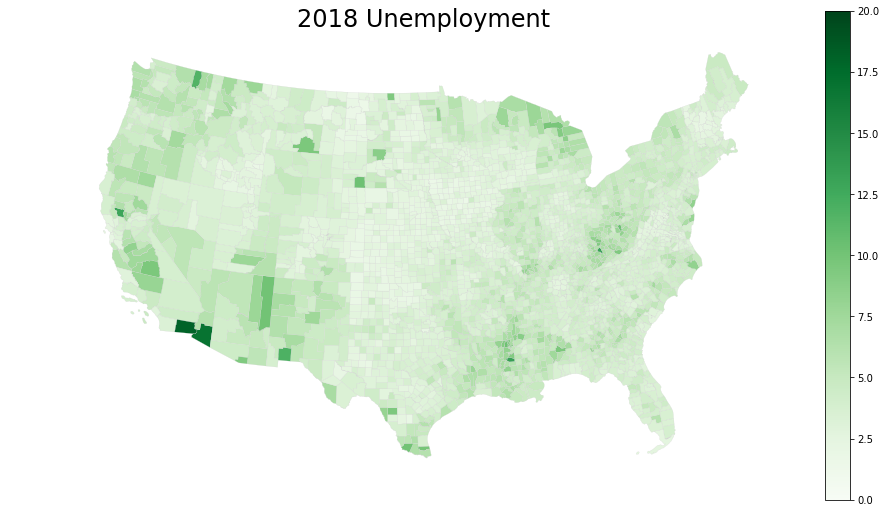

In [69]:
ax = merged.plot(
    column = "percent_unemployed",
    figsize = (16,9),
    cmap = "Greens",
    vmin = 0,
    vmax = 20,
    linewidth = 0.2,
    edgecolor = "lightgray",
    legend = True
)

ax.axis("off")

ax.set_title("2018 Unemployment", fontsize = 24)

Save it as a file

In [70]:
ax.get_figure().savefig("../output/unemployment.png")